# EDA on CraftBeers and their Breweries Datasets

***

## Importing libraries and dataset

In [6]:
import numpy as np
import pandas as pd 
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

%matplotlib inline

In [7]:
beerdata = pd.read_csv('C:/Users/Global/Downloads/archive/beers.csv')

brewery = pd.read_csv('C:/Users/Global/Downloads/archive/breweries.csv')

***
1. The ABV tells you the percentage of alcohol (ethyl alcohol, or ethanol) content in an alcoholic beverage.
2. IBU stands for International Bitterness Units, a scale to gauge the level of a beer's bitterness.
3. IBUs measure the parts per million of isohumulone from hops in a beer, which gives beer bitterness.
***

In [11]:
beerdata.head()
# The ABV tells you the percentage of alcohol (ethyl alcohol, or ethanol) content in an alcoholic beverage.
# IBU stands for International Bitterness Units, a scale to gauge the level of a beer's bitterness.
# IBUs measure the parts per million of isohumulone from hops in a beer, which gives beer bitterness.

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [10]:
brewery.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [12]:
# removing unreq columns
Brewery = brewery.drop(['Unnamed: 0'], axis=1)
Beerdata = beerdata.drop(['Unnamed: 0'], axis=1)

In [13]:
Beerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [14]:
Brewery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    558 non-null    object
 1   city    558 non-null    object
 2   state   558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


In [16]:
print(Beerdata.dtypes)

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object


In [17]:
print(Brewery.dtypes)

name     object
city     object
state    object
dtype: object


In [19]:
Beerdata.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [20]:
Beerdata.shape

(2410, 7)

In [21]:
# to check unique values present
Beerdata.nunique()

abv             74
ibu            107
id            2410
name          2305
style           99
brewery_id     558
ounces           7
dtype: int64

In [22]:
# checking for null avlues
Beerdata.isna().sum()


# observation - ibu is not reliable feature 

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [23]:
Brewery.isna().sum()

name     0
city     0
state    0
dtype: int64

In [24]:
# missing value percentages in dataset for each feature
missing_percentages = Beerdata.isna().sum().sort_values(ascending=False) / len( Beerdata)
missing_percentages

ibu           0.417012
abv           0.025726
style         0.002075
id            0.000000
name          0.000000
brewery_id    0.000000
ounces        0.000000
dtype: float64

## Top 10 Popular beers

In [34]:
print(colored(Beerdata.groupby('name')["name"].count().sort_values(ascending=False).head(10),'yellow'))

name
Nonstop Hef Hop            12
Dale's Pale Ale             6
Oktoberfest                 6
Longboard Island Lager      4
Dagger Falls IPA            3
Boston Lager                3
1327 Pod's ESB              3
Bombshell Blonde            2
Main St. Virginia Ale       2
Narragansett Summer Ale     2
Name: name, dtype: int64


## Top 10 Popular Breweries in United States



In [33]:
print(colored(Brewery.groupby('name')["name"].count().sort_values(ascending=False).head(10),'green'))

name
Blackrocks Brewery              2
Sly Fox Brewing Company         2
Summit Brewing Company          2
Oskar Blues Brewery             2
Otter Creek Brewing             2
Lucette Brewing Company         2
Blue Mountain Brewery           2
Peace Tree Brewing Company      1
Peak Organic Brewing Company    1
Payette Brewing Company         1
Name: name, dtype: int64


## Top 10 popular beer styles

In [35]:
print(colored(Beerdata.groupby('style')["name"].count().sort_values(ascending=False).head(10),'cyan'))

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: name, dtype: int64


## Top 10 cities for beer lovers

In [36]:
print(colored(Brewery.groupby('city')["city"].count().sort_values(ascending=False).head(10),'red'))

city
Portland         17
Chicago           9
Seattle           9
Boulder           9
Austin            8
Denver            8
San Diego         8
Bend              6
San Francisco     5
Cincinnati        4
Name: city, dtype: int64


## How variables are related to each other

In [29]:
# comparing variables to each other
Beerdata.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


<AxesSubplot:>

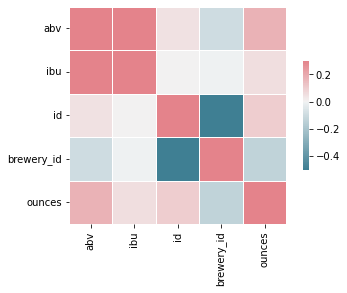

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Beerdata.corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


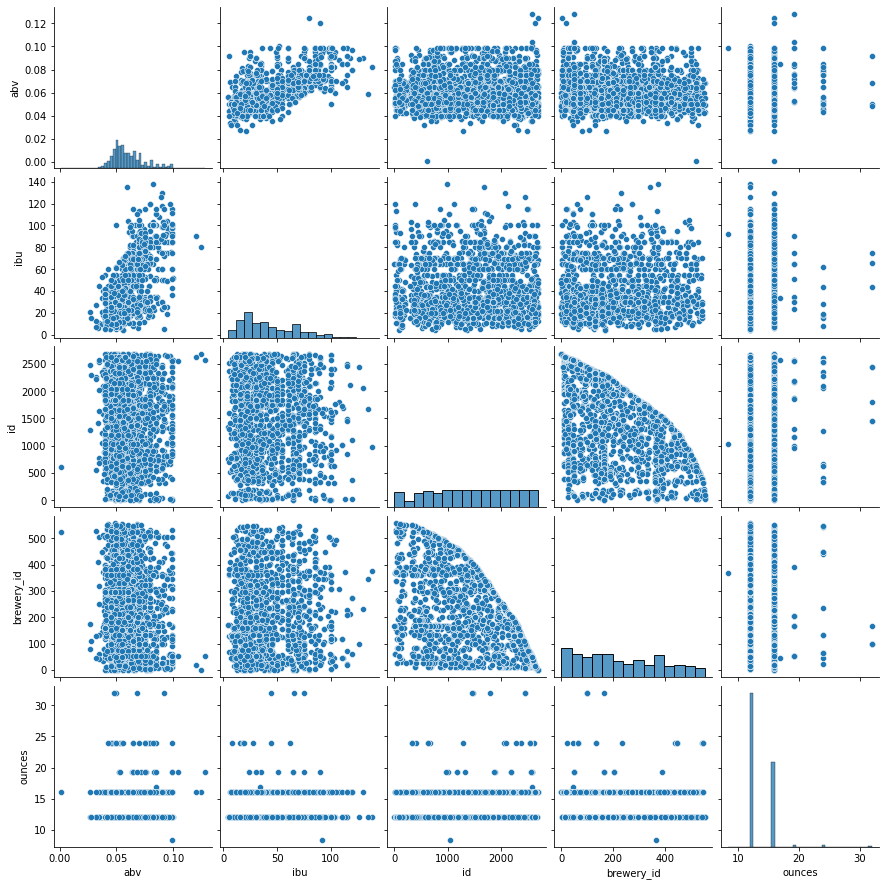

In [31]:
sns.pairplot(Beerdata, palette='viridis')

## abv analysis

In [32]:
Beerdata['abv'].value_counts()

0.050    215
0.055    158
0.060    125
0.065    123
0.052    107
        ... 
0.125      1
0.100      1
0.034      1
0.094      1
0.028      1
Name: abv, Length: 74, dtype: int64

C:\Users\Global\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


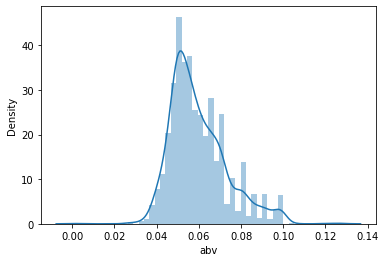

In [37]:
sns.distplot(Beerdata.abv)
plt.show()

In [38]:
# absolute spread of abv for each brewery and style
abv_mean = Beerdata[['brewery_id','abv','style']].groupby(['brewery_id','style']).mean()
print(abv_mean)

                                                  abv
brewery_id style                                     
0          American IPA                         0.045
           American Porter                      0.060
           English Brown Ale                    0.048
           Extra Special / Strong Bitter (ESB)  0.056
           Milk / Sweet Stout                   0.049
...                                               ...
556        American IPA                         0.068
           American Pale Ale (APA)              0.043
           Hefeweizen                           0.049
           Milk / Sweet Stout                   0.049
557        English Pale Ale                     0.049

[1910 rows x 1 columns]


In [39]:
# max abv of each brewery classified on basis of brewery id
df_max = Beerdata[['brewery_id','abv']].groupby(['brewery_id'], as_index=False).max()
# min abv of each brewery classified on basis of brewery id
df_min = Beerdata[['brewery_id','abv']].groupby(['brewery_id'], as_index=False).min()

# brewery with max abv in comparision with other breweries.
abv_max = df_max[['brewery_id','abv']].max()
# brewery with min abv in comparision with other breweries.
abv_min = df_min[['brewery_id','abv']].min()

In [40]:
print(df_max)
print(df_min)

     brewery_id    abv
0             0  0.060
1             1  0.125
2             2  0.072
3             3  0.080
4             4  0.063
..          ...    ...
553         553  0.050
554         554  0.055
555         555  0.055
556         556  0.068
557         557  0.049

[558 rows x 2 columns]
     brewery_id    abv
0             0  0.045
1             1  0.040
2             2  0.048
3             3  0.058
4             4  0.046
..          ...    ...
553         553  0.050
554         554  0.055
555         555  0.055
556         556  0.043
557         557  0.049

[558 rows x 2 columns]


In [41]:
print(abv_max)
print(abv_min)

brewery_id    557.000
abv             0.128
dtype: float64
brewery_id    0.000
abv           0.001
dtype: float64


## No. of beers by alcohol content

C:\Users\Global\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


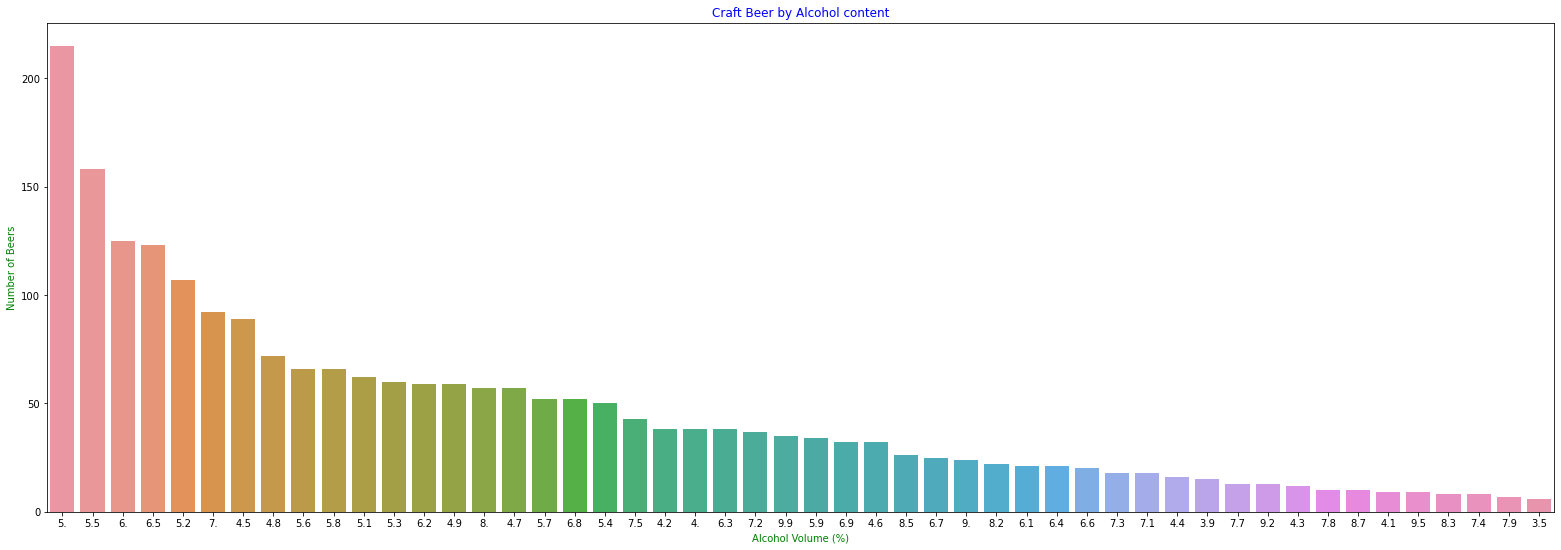

In [45]:
temp = Beerdata.groupby('abv')["name"].count().sort_values(ascending=False).head(50)

#Craft Beers Alcohol content
x = list(temp.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*100))
y = temp.values

fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 27
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x,y)
plt.xlabel("Alcohol Volume (%)",color='green')
plt.ylabel("Number of Beers",color='green')
plt.title("Craft Beer by Alcohol content", color='blue')

plt.show()

## Bottle size variation

C:\Users\Global\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


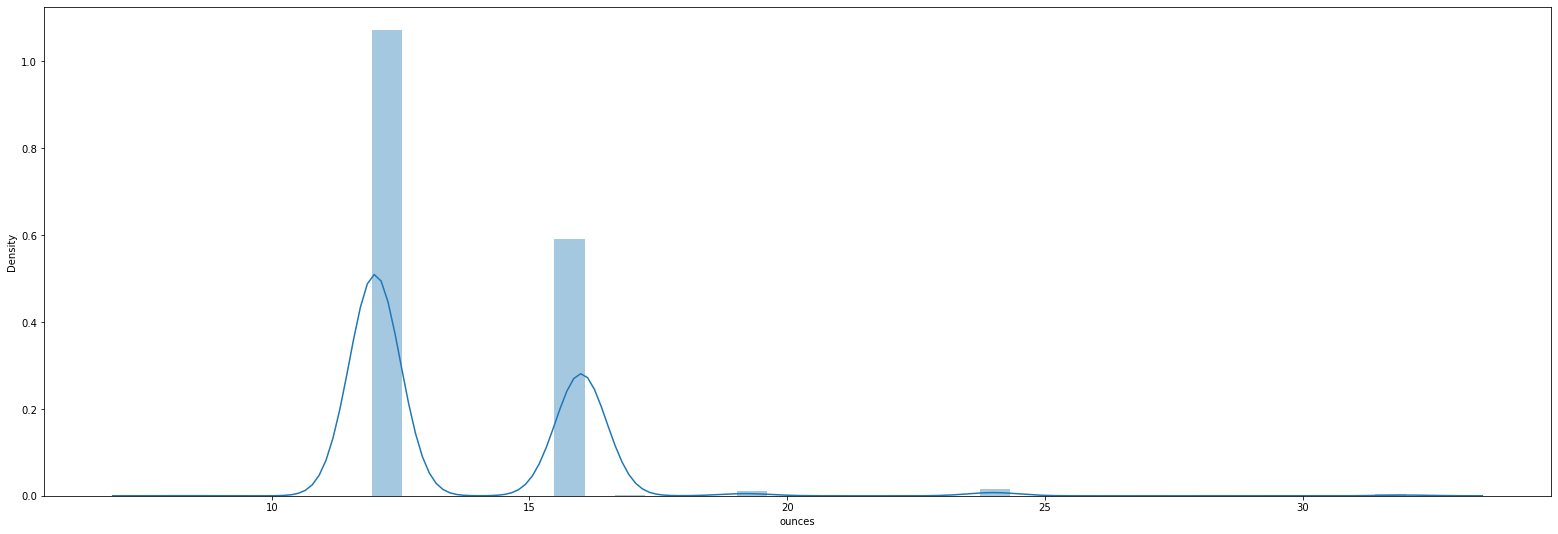

In [44]:
sns.distplot(Beerdata.ounces)
plt.show()

## Ratio between alcohol and bottle size & ibu and bottle size

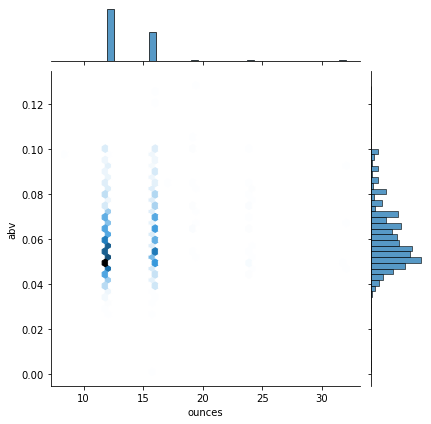

In [46]:
sns.jointplot(x = "ounces", y = "abv",kind = "hex", data = beerdata)
plt.show()

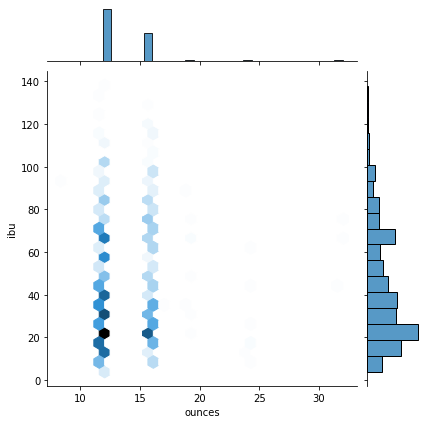

In [47]:
sns.jointplot(x = "ounces", y = "ibu",kind = "hex", data = beerdata)
plt.show()

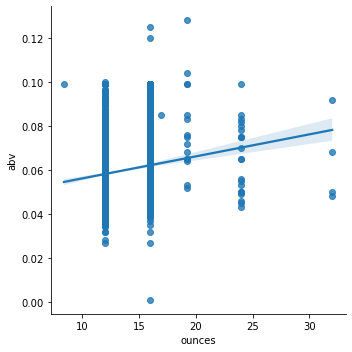

In [48]:
sns.lmplot(x='ounces', y='abv', data=beerdata)

#scatterplot with regression line

## Alcohol per bottle 

In [49]:
Beerdata['alcohol_per_bottle_inounces'] = Beerdata['ounces']*Beerdata['abv']

In [50]:
Beerdata.head()

,abv,ibu,id,name,style,brewery_id,ounces,alcohol_per_bottle_inounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,0.600
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,0.792
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,0.852
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,1.080
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,0.900


## Alcohol content vs Bitterness

C:\Users\Global\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Craft Beers -- Bitterness vs Alcohol Content ')

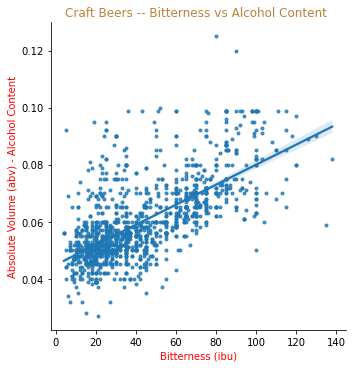

In [52]:
beertemp = Beerdata
beertemp.dropna(inplace=True)
sns.lmplot("ibu","abv", data=beertemp, markers=".")
plt.xlabel("Bitterness (ibu)",color='red')
plt.ylabel("Absolute Volume (abv) - Alcohol Content",color='red')
plt.title("Craft Beers -- Bitterness vs Alcohol Content ", color='#BE823A')

## Craft beer with high alcohol and average bitterness

In [53]:
HighBeer = beertemp.sort_values("abv",ascending=False)
AvgBitterness = beertemp["ibu"].mean()
HighBeer = HighBeer[HighBeer["ibu"]<=AvgBitterness].reset_index().head(1)
HighBeer[["name","style"]]

,name,style
0,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale


## Craft beer with average alcohol and high bitterness

In [54]:
High_Beer = beertemp.sort_values("abv",ascending=False)
Avgalcohol = beertemp["abv"].mean()
High_Beer = High_Beer[High_Beer["abv"]<=Avgalcohol].reset_index().head(1)
High_Beer[["name","style"]]

,name,style
0,Brownstone,American Brown Ale


## Summary

1. ibu feature has many missing values.
2. average alcohol content is 0.059773.
3. Maximum number of beers are with alcohol content 5.
4. 12 ounces is the most common bootle size.
5. bottle ounces and alcohol content show positive linear relationship.
6. alcohol content per bottle is calculated.
7. bitterness and alcohol content are also positively linearly correlated.


***
Sai Sharanya Y

***